### K-Means Clustering

Often times we deal with observations for which there is no target or response variable. So, there is no way to do any predictions (at least not directly), as we don't have a target variable to predict. In these situations, however, what we instead try to do is uncover some structure within the data, and this is where clustering methods enter the picture.


Clustering methods fall into the realm of **unsupervised machine-learning techniques** and refer to a set of techniques designed to identify <b> subgroups</b> or <b>clusters</b> within a data set. In other words, the idea is to partition a data set into subgroups in such a way that the members within each group are as similar as possible to one another and quite distinct from the members of other groups.

A natural question is what exactly do we mean by <b> similar</b>? The answer depends on the data set we are dealing with as well as the type of method we use. In what follows we will discuss one of the simplest and widely used clustering method, namely K-Means Clustering.

&emsp; ***How does K-Means clustering work?***

The K-Means clustring method is quite intuitive and simple. Let $\{I\}_i^K$ denote the collection of sets containing the indicies of each of the observations in our data. We require that these sets satisfy the following conditions

$$\bigcup_i I_i=\{1,\dots,n\},\,\text{ and } I_i\cap I_j=\emptyset \, \forall i\neq j$$

We are going to consider a good clustering if the variation within each cluster is as small as it can possibly be.

If we denote the within-cluster variation for cluster $I_k$ by $V(I_k)$ then we want would want to solve the following optimization problem $$\min_{I_k\\ k=1,\dots,K}\left\{\sum_{k=1}^KV(I_k)\right\}$$

In other words, we would want to find the right index sets which result in the lowest total within-cluster variation.

There are many ways to quantify the <b>within-cluster variation</b>, but perhaps the simplest one is to just take the Euclidean distance. In other words, $$V(I_k)=\frac{1}{|I_k|}\sum_{i,j\in I_k}\big|\big|\vec{x}^{(i)}-\vec{x}^{(j)}\big|\big|^2$$

where $$||\vec{x}^{(i)}-\vec{x}^{(j)}||^2=\sum_{k=1}^p\left(x^{(i)}_k-x^{(j)}_k\right)^2$$


In Layman's terms, we want to group together observations that have the smallest Euclidean distance from one another. 

&emsp; ***The algorithm***


Finding a global solution to the optimization problem above is a difficult problem, since there are essentially $K^n$ ways to partition $n$ observations into $K$ clusters. Searching over this solution space is not feasible especially if $K$ and $n$ are large. The K-Means Algorightm finds a local optimum to the optimization problem above, which for many practical purposes proves to be good enough.

Below is a description of the algorithm:

<b>Step 1:</b> Randomly initiallize cluster assignments. That is, to each observation assign randomly a number between $1$ and $K$.'

<b>Step 2:</b> Iterate the following steps until the cluster assignments no longer change:

<b>Step 3:</b> For each of the $K$ clusters compute the cluster <b> centroid</b>; that is the means of the observations assigned to each cluster. For example, the centroid for cluster $I_j$ would be 

$$\bar{x}^{(j)}=\frac{1}{|I_j|}\sum_{\vec{x}_i\in I_j}\vec{x}_i$$

<b>Step 4:</b> Assign each observation to the cluster whose Euclidean distance to its centroid is the smallest.

In [40]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # Artificial data

In [41]:
# There's only 2 features but in real life there is way more features

# This function creates artificial blobs
def create_dataframe(feat_names, n_feat, n_samp, centers, std, random_state =1):
    X,y = make_blobs(n_samples = n_samp, centers = centers, cluster_std=std, n_features= n_feat,
                    random_state = random_state, center_box = (0,6))
    cancer = pd.DataFrame()
    for name, i  in zip(feat_names, range(n_feat)):
        cancer[name] = X[:,i]
    return cancer, y

df, y = create_dataframe(feat_names=['X1', 'X2'], n_feat=2, n_samp=500, std=0.3, centers=4, random_state=30)
df.head()

,X1,X2
0,4.216186,1.703706
1,5.407564,1.727611
2,6.199649,2.300265
3,3.803320,2.270811
4,5.377644,2.022812


&emsp; ***Visualization of the clusters***


Since this is a basic example with only two features, let's plot a scatterplot and see what this data looks like. Remember that in real life we almost always deal with higher dimensional data sets so visualizing them may not be possible (at least not without some more work).

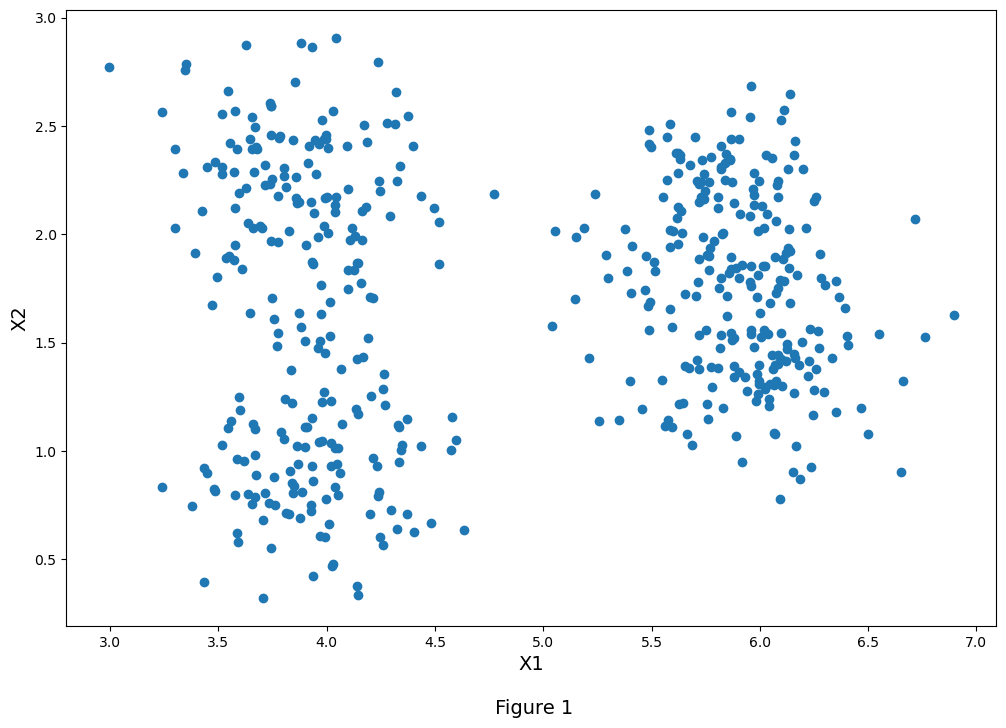

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(df['X1'], df['X2'])
plt.xlabel('X1\n\n Figure 1', fontsize=14)
plt.ylabel('X2', fontsize=14)
plt.show()

&emsp; ***Identifying clusters for a preliminary idea***


From the plot above, it's apparent that there are three different clusters in the data. K-Means clustering is a simple way to help us identify these 3-4. In other words, it will be able to tell us which observations fall into which cluster. It also enables us to properly assign any new observations that we may obtain in the future. 

In [43]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib import animation, rc 
from IPython.display import HTML 
from sklearn.cluster import KMeans

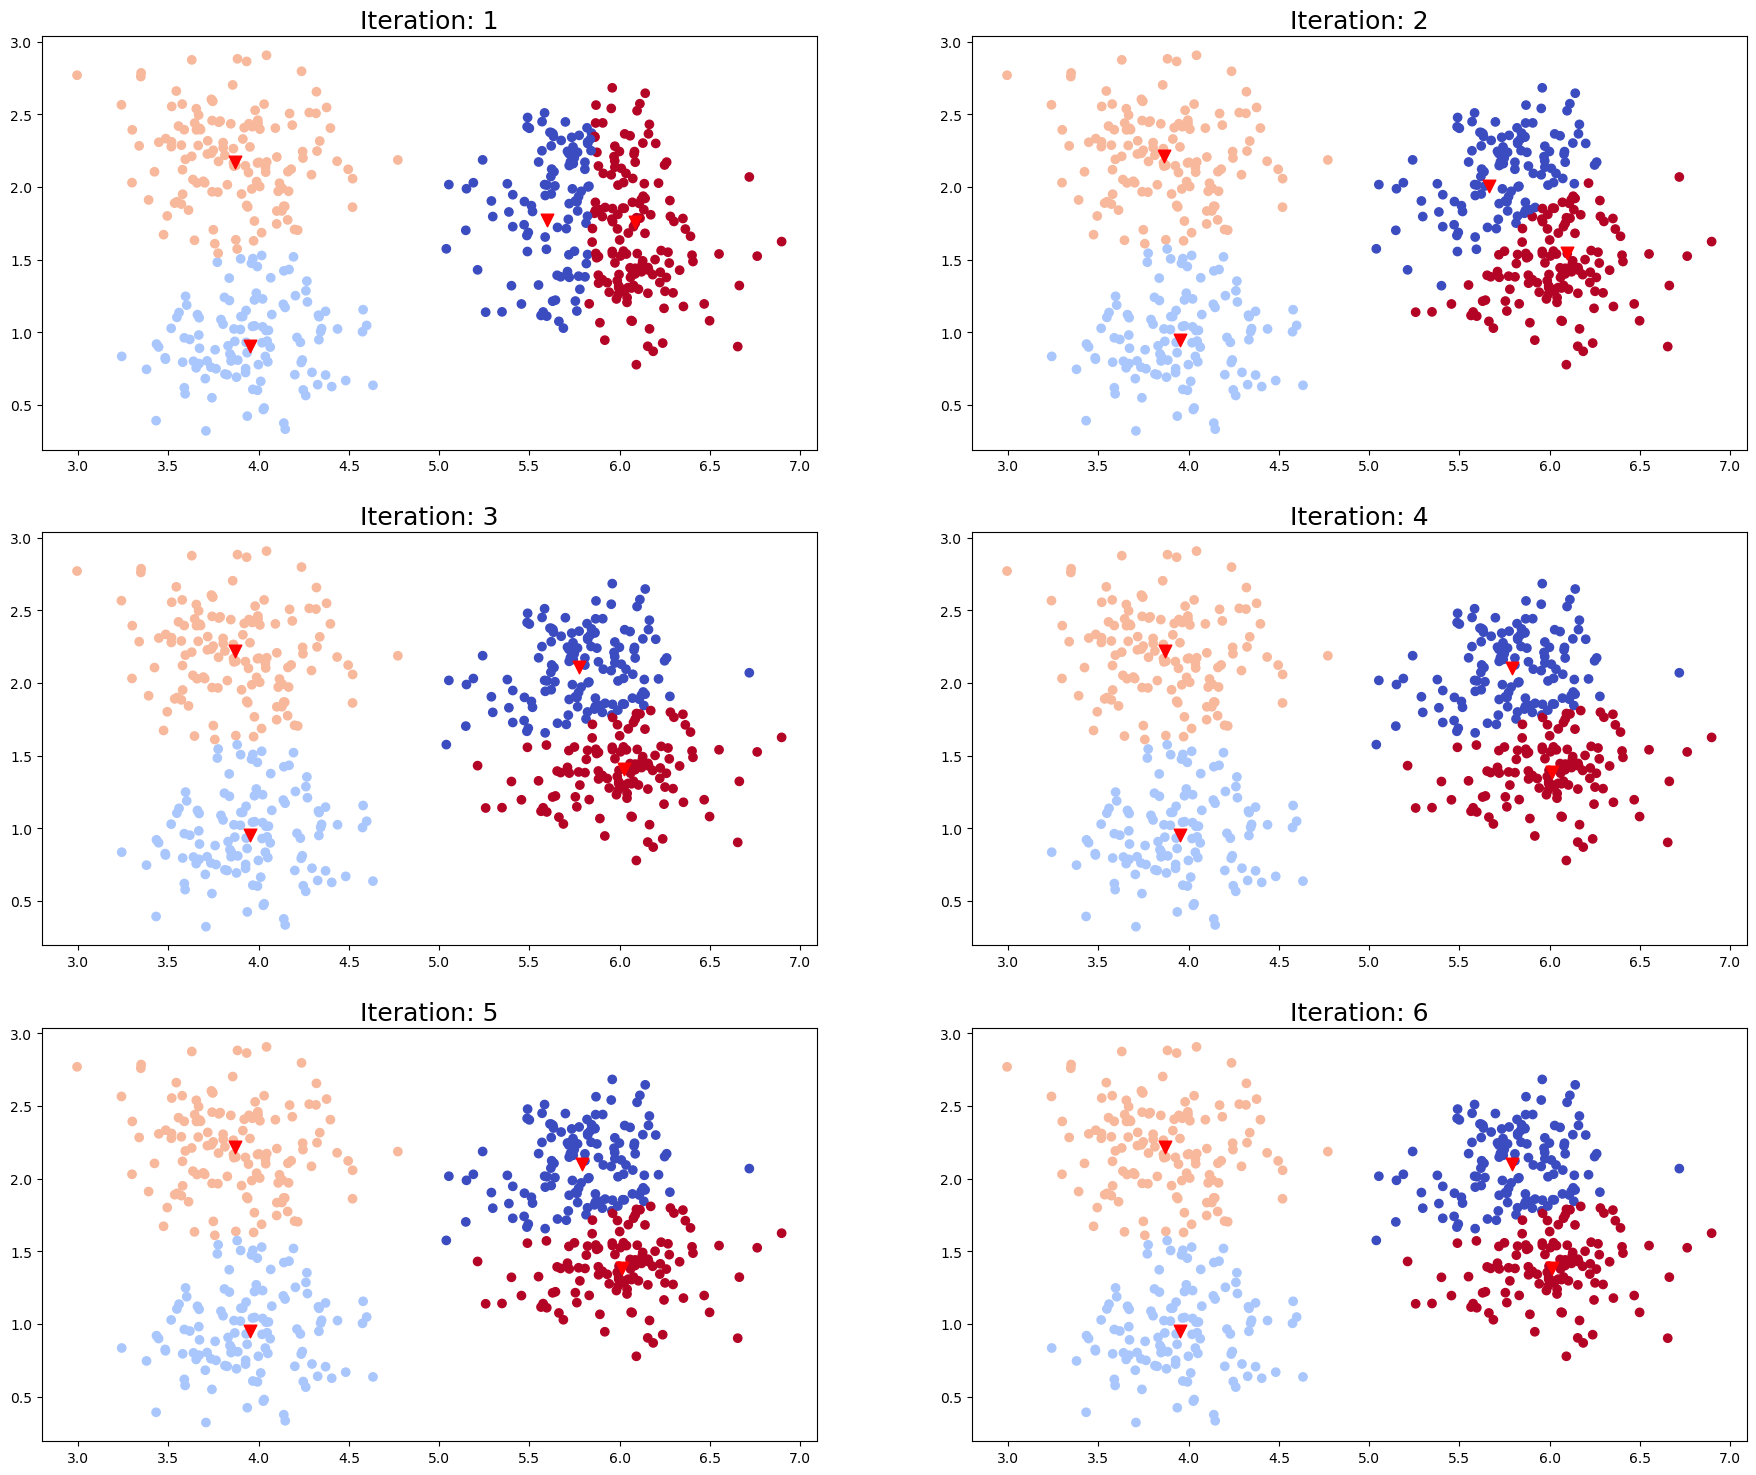

In [45]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

plt.figure(figsize=(22,44))
m = 7
for i in range(1,m):
    km=KMeans(n_clusters=4, max_iter=2*i-1,init='k-means++', n_init=1, random_state=101)
    km.fit(df)
    labels=km.labels_
    centers=km.cluster_centers_
    
    plt.subplot(m,2,i)
    
    plt.scatter(df['X1'],df['X2'],c=labels, cmap='coolwarm')
    plt.scatter(x=centers[:,0],y=centers[:,1],color='r', marker='v',s=82)
    plt.title("Iteration: {}".format(i), fontsize=18)


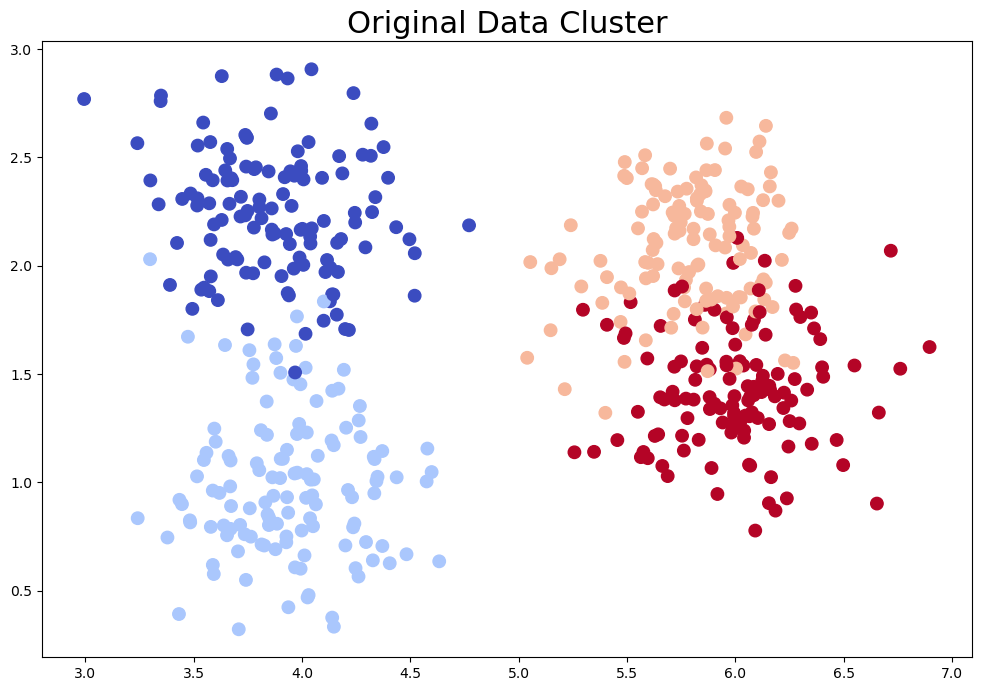

In [19]:
fig = plt.figure(figsize = (12,8))

plt.scatter(df['X1'], df['X2'], c=y, s=80, cmap = 'coolwarm')
plt.title("Original Data Cluster", fontsize = 22)
plt.show()

&emsp; ***How to pick K?***

One coarse method of picking $K$ is via the <b>elbow</b> trick. Basically we plot the <b> inertia</b> score as a function of $K$ and pick the $K$ that lies at the <b> elbow </b> of the graph. Another way is the silhouette method.

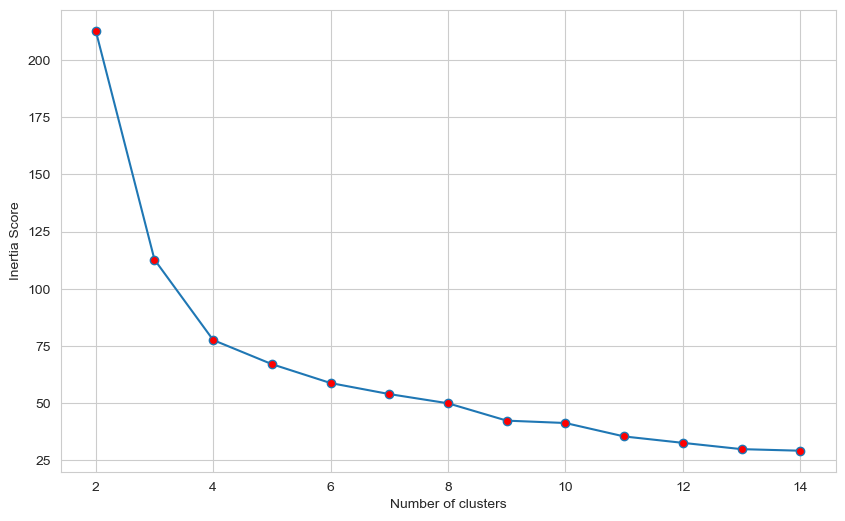

In [ ]:
inertia_score = []
for i in range(2, 15):
    km = KMeans(n_clusters=i)
    km.fit(df)
    inertia_score.append(km.inertia_)

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
plt.plot(range(2, 15), inertia_score, marker='o', markerfacecolor='r')
plt.xlabel("Number of clusters")  
plt.ylabel("Inertia Score")       
plt.show()

We observe that until $K=4$ there is a significant drop in the inertia score, but after that it levels off. So, in this case, even if we didn't know to begin with that our data set had four distinct clusters in it, it would have been reasonable to pick $K=4$. Sometimes, this is not as easy to spot and other more sophisticated ways are required to pick the right $K$.

&emsp; ***Limitations of the K-Means Method***


Despite the fact that K-Means is a fast and very useful method to identify subgroups within data, it has its shortcomings.

<b>1.-</b> You must specify the number of clusters before you run the algorithm. Obviously this is a challenge, since in unsupervised learning we don't know apriori how many or if we have any clusters in our data to begin with.

<b>2.-</b> It performs poorly when clusters are of varying sizes, shapes, or densities. For example, if one cluster is of spherical shape, and others have a more elongated ellipsoidal shape, K-Means will most likely perform poorly as it simply measures distances between points and is unable to pick up on such trends.

<b>3.-</b> It performs poorly on observations that lie on the boundary between two clusters.
